In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_2014 = pd.read_csv("CAD_data_through_2025/class_data_2014.csv")
data_2015 = pd.read_csv("CAD_data_through_2025/class_data_2015.csv")
data_2016 = pd.read_csv("CAD_data_through_2025/class_data_2016.csv")
data_2017 = pd.read_csv("CAD_data_through_2025/class_data_2017.csv")
data_2018 = pd.read_csv("CAD_data_through_2025/class_data_2018.csv")
data_2019 = pd.read_csv("CAD_data_through_2025/class_data_2019.csv")
data_2020 = pd.read_csv("CAD_data_through_2025/class_data_2020.csv")
data_2021 = pd.read_csv("CAD_data_through_2025/class_data_2021.csv")
data_2022 = pd.read_csv("CAD_data_through_2025/class_data_2022.csv")
data_2023 = pd.read_csv("CAD_data_through_2025/class_data_2023.csv")
data_2024 = pd.read_csv("CAD_data_through_2025/class_data_2024.csv")
data_2025 = pd.read_csv("CAD_data_through_2025/class_data_2025.csv")

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/427252023.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2017 = pd.read_csv("CAD_data_through_2025/class_data_2017.csv")
/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/427252023.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2019 = pd.read_csv("CAD_data_through_2025/class_data_2019.csv")
/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/427252023.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv("CAD_data_through_2025/class_data_2020.csv")
/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/427252023.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv("CAD_data_through_2025/class_data_

In [4]:
data_2014["calltime"] = pd.to_datetime(data_2014["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2015["calltime"] = pd.to_datetime(data_2015["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2016["calltime"] = pd.to_datetime(data_2016["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2017["calltime"] = pd.to_datetime(data_2017["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2018["calltime"] = pd.to_datetime(data_2018["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2019["calltime"] = pd.to_datetime(data_2019["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2020["calltime"] = pd.to_datetime(data_2020["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2021["calltime"] = pd.to_datetime(data_2021["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2022["calltime"] = pd.to_datetime(data_2022["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2023["calltime"] = pd.to_datetime(data_2023["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2024["calltime"] = pd.to_datetime(data_2024["calltime"], format="%Y-%m-%d %H:%M:%S.%f")
data_2025["calltime"] = pd.to_datetime(data_2025["calltime"], format="%Y-%m-%d %H:%M:%S.%f")

In [5]:
cad_data = pd.concat([data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024, data_2025], axis = 0)

In [6]:
#cad_data

In [7]:
pattern = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

In [8]:
def classify(call_sign):
    if pd.isna(call_sign):
        return "unknown"
    elif re.fullmatch(pattern, call_sign):
        return ("not police")
    else:
        return ("police")
cad_data["unittype"] = cad_data["primeunit"].apply(classify)

In [9]:
cad_data["responder"] = cad_data["primeunit"].fillna("").apply(lambda x: "cahoots" if re.fullmatch(pattern, x) else "police")

In [10]:
cad_data = cad_data.dropna(subset=["calltime"])
cad_data["date"] = cad_data["calltime"].dt.date
cad_data["hour"] = cad_data["calltime"].dt.hour

In [11]:
#cad_data.head()

In [12]:
cahoots_data = cad_data[cad_data["responder"] == "cahoots"]
#cahoots_data

In [13]:
def seasons(month):
    if month in [12, 1, 2]:
        return 1 
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    elif month in [9, 10, 11]:
        return 4

cahoots_data["season"] = cahoots_data["date"].apply(lambda x: seasons(x.month))
#cahoots_data.head()

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/3832479990.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["season"] = cahoots_data["date"].apply(lambda x: seasons(x.month))


In [14]:
cahoots_data["month"] = cahoots_data["calltime"].dt.month
cahoots_data["day of the week"] = cahoots_data["calltime"].dt.weekday

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/2424949543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["month"] = cahoots_data["calltime"].dt.month
/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/2424949543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["day of the week"] = cahoots_data["calltime"].dt.weekday


In [15]:
call_volume_season = cahoots_data.groupby(["season","yr"]).size().reset_index(name = "call_volume")
call_volume_hourly = cahoots_data.groupby(["hour", "yr"]).size().reset_index(name = "call_volume")
call_volume_monthly = cahoots_data.groupby(["month", "yr"]).size().reset_index(name = "call_volume")
call_volume_weekday = cahoots_data.groupby(["day of the week", "yr"]).size().reset_index(name = "call_volume")

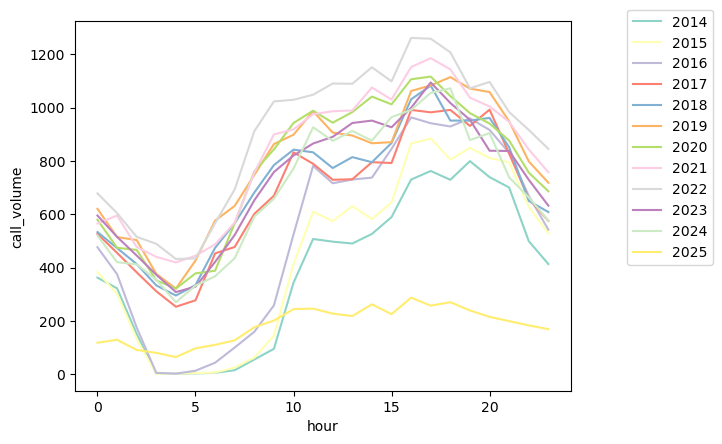

In [35]:
sns.lineplot(data = call_volume_hourly, x = "hour", y = "call_volume", hue = "yr", legend = "full", palette = "Set3")
plt.legend(bbox_to_anchor=(1.1, 1.05))

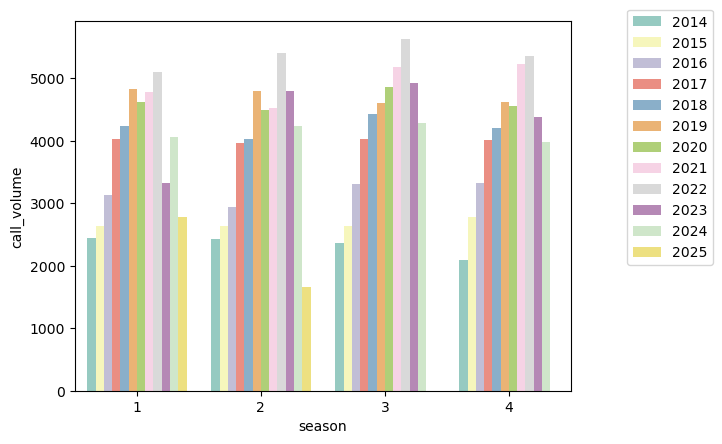

In [17]:
sns.barplot(data = call_volume_season, x = "season", y = "call_volume", hue = "yr", palette = "Set3")
plt.legend(bbox_to_anchor=(1.1, 1.05))

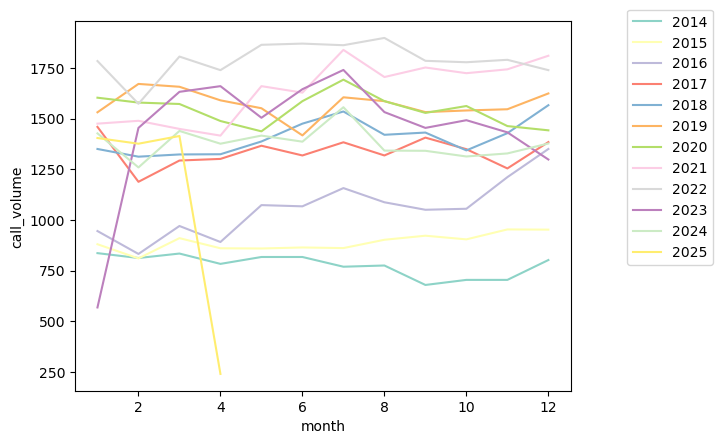

In [19]:
sns.lineplot(data = call_volume_monthly, x = "month", y = "call_volume", hue = "yr", palette = "Set3")
plt.legend(bbox_to_anchor=(1.1, 1.05))

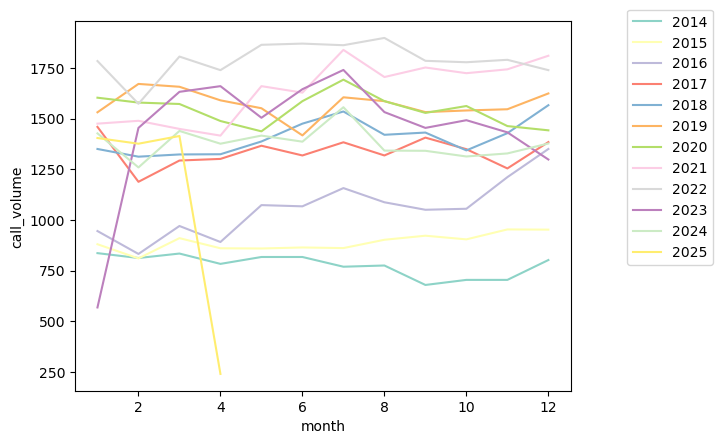

In [37]:
sns.lineplot(data = call_volume_monthly, x = "month", y = "call_volume", hue = "yr", palette = "Set3")
plt.legend(bbox_to_anchor=(1.1, 1.05))

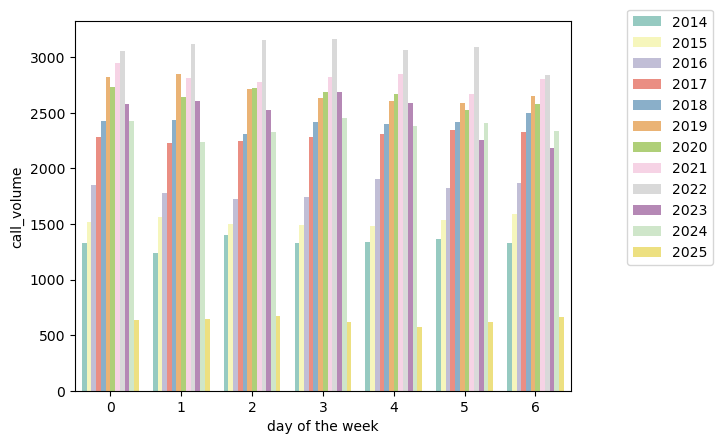

In [23]:
sns.barplot(data = call_volume_weekday, x = "day of the week", y = "call_volume", hue = "yr", palette = "Set3")
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [25]:
def covid_effects(year):
    if year < 2020:
        return "before covid"
    else:
        return "after covid"

cahoots_data["covid ?"] = cahoots_data["yr"].apply(covid_effects)

/var/folders/81/5c4r_xwd7xbcftw3kjtkx4hw0000gn/T/ipykernel_47332/3691840847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cahoots_data["covid ?"] = cahoots_data["yr"].apply(covid_effects)


In [27]:
call_volume_covid = cahoots_data.groupby(["covid ?", "yr"]).size().reset_index(name = "call_volume")

<Axes: xlabel='yr', ylabel='call_volume'>

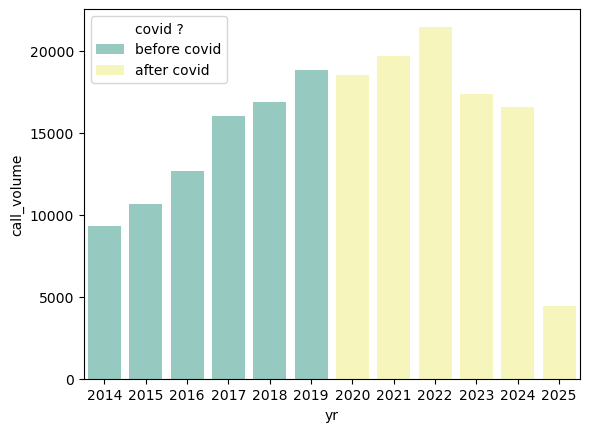

In [29]:
sns.barplot(call_volume_covid, x = "yr", y = "call_volume", hue = "covid ?", palette = "Set3")

In [31]:
from scipy.stats import kruskal
groups = [group["call_volume"].values for _, group in call_volume_weekday.groupby("day of the week")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", h_stat)
print("p-value:", p_val)

Kruskal-Wallis H-statistic: 0.4676659984205385
p-value: 0.9982100005540023


In [33]:
groups = [group["call_volume"].values for _, group in call_volume_hourly.groupby("hour")]

h_stat, p_val = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", h_stat)
print("p-value:", p_val)

Kruskal-Wallis H-statistic: 159.688894894416
p-value: 1.915827071124772e-22
